# Binary classification with scikit-learn
--------------------------
### Contents:
- **Background**
- **Data importing/preprocessing - [10 points]**
- **Feature selection and dimensionality reduction - [15 points]**
- **SVM classifier - [20 points]**
- **Logistic regression - [30 points]**
- **Random forest - [25 points]**
- **1 minute feedback - [Optional]**

--------------------------

### Section 1: Background 
In this assignment, your task is to build a binary classifier that can distinguish between two brain disorders - Alzheimer's (AD) and Progressive Supranuclear Palsy (PSP). We will be using gene expression data sourced by RNA sequencing (RNA-seq) the brain tissue of  participants. The study can be found at [<sup>1</sup>](#fn1).

Using RNA sequencing we can quantitatively measure which genes are activated and their expression levels. By comparing the gene expression levels of normal and mutated cells, we can identify differences that might reveal which genes are causing these mutations. These gene expression patterns can also serve as indicators to detect and differentiate similar diseases such as AD and PSP.


<span id="fn1"> <sup>1</sup> https://www.nature.com/articles/sdata201689</span>

--------------------------




### Section 2: Data importing/preprocessing -  [10 points]

- Load the gene expression dataset and the labels into pandas dataframe. 
- Retain only 'Diagnosis' and 'ID' columns in the labels dataframe.
- Combine gene_exp and labels dataframes based on 'ID'. 
- Remove samples containing labels other than Alzheimer's ('AD') or Progressive supranuclear palsy ('PSP').
- Encode textual labels to numbers. For example 'AD' to 0 and 'PSP' to 1.

--------------------------


In [1]:
import pandas as pd
import numpy as np

# do not modify this
np.random.seed(89802024)


/var/folders/j_/9psz6scs7yv105rpfzw5v4r80000gn/T/ipykernel_41890/3422406500.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read the gene expression dataset (normalized_gene_expression.txt) into a dataframe

gene_exp = pd.read_csv('normalized_gene_expression.txt', sep='\t')
gene_exp.head()

,ID,ENSG00000223972,ENSG00000227232,ENSG00000243485,ENSG00000268020,ENSG00000240361,ENSG00000186092,ENSG00000238009,ENSG00000239945,ENSG00000233750,...,ENSG00000198886,ENSG00000210176,ENSG00000210184,ENSG00000210191,ENSG00000198786,ENSG00000198695,ENSG00000210194,ENSG00000198727,ENSG00000210195,ENSG00000210196
0,11344_TCX,-2.168275,2.867350,-2.235659,-2.878004,-2.878004,-2.921482,0.972981,2.589508,2.049147,...,15.177233,8.620554,8.415900,9.195871,13.407342,13.089514,10.035159,14.350876,8.401389,9.124693
1,11316_TCX,-2.667791,2.919402,-3.118351,-2.963895,-2.963895,-2.963895,1.602722,3.196802,2.830484,...,15.177233,11.611706,11.478740,12.284014,13.527804,13.350245,12.613126,14.240878,10.760811,12.021301
2,11431_TCX,-3.391138,3.153625,-2.106056,-4.424961,-4.418319,-4.540941,1.453881,2.986039,2.836847,...,15.177233,10.502635,10.133659,11.504803,13.407342,13.138792,11.990068,14.472362,9.848741,10.852588
3,11341_TCX,-2.801722,3.269001,-1.133302,-3.118351,-3.118351,-3.175145,2.442415,3.961310,2.803290,...,14.764855,9.920577,10.133659,11.255892,13.466460,13.350245,12.182661,14.240878,9.637298,9.904126
4,11289_TCX,-0.162419,5.284041,0.250976,-2.218957,-2.218957,-2.328570,2.065006,3.218117,2.857921,...,14.764855,11.780232,11.209200,12.021301,13.350245,13.189390,12.353690,14.350876,11.722941,11.959163


In [3]:
# Read the labels for the dataset from labels.csv file

labels = pd.read_csv('labels.csv')
labels.head()

,ID,Diagnosis,RIN,3primeBias,Sex,AgeAtDeath
0,1005_TCX,AD,8.6,1.333306,0,90_or_above
1,1010_TCX,AD,8.3,1.593823,1,63
2,1015_TCX,AD,8.7,1.671713,1,77
3,1019_TCX,AD,7.8,1.402270,0,86
4,1029_TCX,AD,9.7,1.599649,0,69


In [4]:
# Drop unnecessary columns in labels dataframe

labels = labels.drop(columns=['RIN', '3primeBias', 'Sex', 'AgeAtDeath'])
labels.head()

,ID,Diagnosis
0,1005_TCX,AD
1,1010_TCX,AD
2,1015_TCX,AD
3,1019_TCX,AD
4,1029_TCX,AD


In [5]:
# Merge both dataframes based on column 'ID'

df = pd.merge(gene_exp, labels, on='ID')
df['Diagnosis'].value_counts()

Diagnosis
PSP                 82
AD                  80
Control             76
Pathologic Aging    30
Name: count, dtype: int64

In [6]:
# Retain only samples having labels of 'AD' or 'PSP'

df = df[df['Diagnosis'].isin(['AD', 'PSP'])]

# Verify the result
df['Diagnosis'].value_counts()


Diagnosis
PSP    82
AD     80
Name: count, dtype: int64

In [7]:
# Separate the merged dataframe into features and labels. Remove 'ID' column

X = df.drop(columns=['ID', 'Diagnosis']) # features
y = df['Diagnosis'] # labels


In [8]:
# Encode textual labels in 'y' to numbers

from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

assert(np.all((y == 0) | (y == 1)))

--------------------------
### Section 3 - Feature selection and dimensionality reduction -  [15 points]

On analyzing the shape of the gene expression dataframe we can see that the number of features (p) is much larger than the number of observations (N). This is known as the p >> N problem, and is commonly seen in genomics and healthcare datasets.
To mitigate this problem, we will compare the effects of different feature selection and dimensionality reduction techniques so that we have a more compact feature space. These methods include:
- Randomly selecting 100 features.
- Selecting the top 1% of most variant features.
- Performing PCA and select principal components that account for 95% of the total explained variance.
    - Plot the first two principal components of X_projected, coloring data points by their labels. Explain if the data is linearly separable in this plot.

  
--------------------------


In [9]:
# Randomly select 100 features

X_rand = X.sample(n=100, axis=1)

assert X_rand.shape == (162, 100)

In [10]:
# Select the top 1% of the features with the most variance (hint: np.var)

variances = np.var(X, axis=0)

top_1_percent = int(0.01 * X.shape[1])

top_features = np.argsort(variances)[-top_1_percent:]  

X_var = X.iloc[:, top_features]

# Verify the shape
X_var.shape

(162, 557)

In [11]:
# Use PCA and select only the components contributing to 95% of the total variance

from sklearn.decomposition import PCA

X_projected = PCA(n_components=0.95).fit_transform(X)

X_projected.shape

(162, 140)

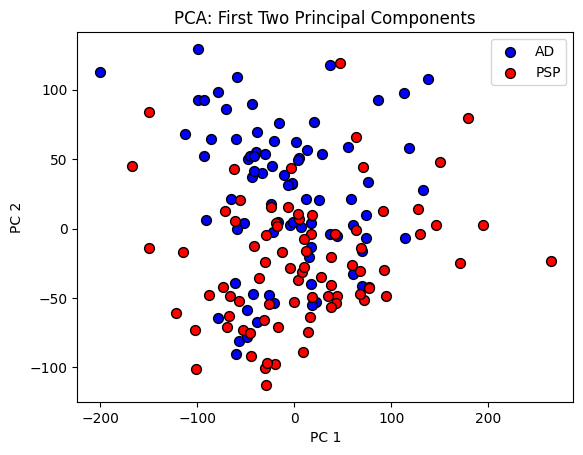

In [12]:
# Scatter plot of the first two principal components.

import matplotlib.pyplot as plt

plt.scatter(X_projected[y == 0, 0], X_projected[y == 0, 1], label='AD', color='blue', edgecolor='k', s=50)
plt.scatter(X_projected[y == 1, 0], X_projected[y == 1, 1], label='PSP', color='red', edgecolor='k', s=50)
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

#### Q1: Is the dataset linearly separable?


From the plot of the first two principal components (PC1 and PC2), we can see that the data points corresponding to Alzheimer's disease (AD) and Progressive Supranuclear Palsy (PSP) significantly overlap. In a linearly separable dataset, it would be possible to draw a straight line that separates the two classes without misclassifications. However, in this case, there is no clear boundary where a straight line could perfectly separate the blue and red points, indicating that the dataset is not linearly separable.

### Section 4: SVM classifier  - [20 points]
 

- Complete the 'evaluate_classifier' function to implement a SVM classifier. Use GridSearchCV to search for the optimal kernel and parameter C (C determines the margin width).
- Use 10-fold StratifiedKFold for cross-validation (CV) when searching. Set scoring to 'accuracy'. StratifiedKFold will divide our dataset into 10 sets, the model will be trained on 9 sets and tested on 1 set. This results in 10 models, each fitted on different combinations of sets. 
- Print the best parameters and score found for each of X_rand, X_var, and X_projected after cross validation.

NOTE: We will not be doing a train-val-test split of the dataset in this assignment because of the small sample size. We will do a cross-validated train-test split for evaluations.


--------------------------


In [13]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold, GridSearchCV


def evaluate_classifier(clf, X, y, scoring, parameters, n_splits=10):
    # Create StratifiedKFold validation
    skf = StratifiedKFold(n_splits=n_splits)
    
    # Grid search for the two parameters (kernel, C)
    grid_search = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scoring, cv=skf)
    
    # Fit the grid search to the data
    grid_search.fit(X, y)
    
    # Print the best parameters and score
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_}")

    return grid_search


parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.01, 0.1, 1, 10]}
scoring = 'accuracy'

# Intiate a SVM classifier
clf = svm.SVC()

evaluate_classifier(clf, X_rand, y, scoring, parameters)
evaluate_classifier(clf, X_var, y, scoring, parameters)
evaluate_classifier(clf, X_projected, y, scoring, parameters)


Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best score: 0.7658088235294118
Best parameters: {'C': 10, 'kernel': 'rbf'}
Best score: 0.7900735294117647
Best parameters: {'C': 10, 'kernel': 'rbf'}
Best score: 0.8099264705882353


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

#### Q2: Is `X_projected` performing better than the other two?


Yes, X_projected is performing better than the other two. The reason X_projected performs better is due to the effectiveness of PCA in reducing dimensionality by capturing the most important patterns in the data. Unlike randomly selecting features (X_rand), which can retain irrelevant or noisy information, PCA focuses on the components that explain the most variance, helping the model generalize better. Additionally, while selecting the most variant features (X_var) can help, it doesn't always guarantee the inclusion of features that are most relevant for distinguishing between Alzheimer's and PSP. By reducing noise and retaining essential information, X_projected leads to improved classification performance.

### Section 5: Logistic regression - [30 points]

We explored three basic methods for feature selection. Another approach for having fewer features is regularization. In lasso regularization, as we increase the parameter (it is called 'alpha' in sklearn), more and more coefficients of our features are shrunk to zero.

- Build logistic regression models using lasso regularization (L1 penalty) with varying alpha values.  
- We'll perform cross-validation using the 'cross_validate' function to measure the performance of models. We will again use StratifiedKFold with 10 splits, but remember to get the splits on the original dataframe 'X'. 
    - Set scoring to 'accuracy'.
    - Record the mean test accuracy across CV splits for each alpha.
    - Record the mean number of non-zero coefficients across CV splits for each alpha.
- Repeat the above process but use ridge regression (l2 penalty) in logistic regression.
- Plot the number of non-zero feature coefficients recorded in both lasso and ridge regression versus alpha.  
- Plot cv accuracy recorded for both penalties versus alpha. Write two lines explaining why accuracy decreases as we increase alpha in lasso regression?


Note: It may take awhile to run. Also, you can ignore any possible messages regarding convergence.

--------------------------


In [14]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression


alphas = np.array([0.1, 1, 10, 100, 1000])
lasso_cv_acc = []
lasso_non_zero_coeff = []
ridge_non_zero_coeff = []
ridge_cv_acc = []

# Create StratifiedKFold validation of 10 splits on 'X'
skf = StratifiedKFold(n_splits=10)

for a in alphas:

    # Instantiate a logistic regression object. Use 'saga' solver and 'l1' penalty.
    clf_lasso = LogisticRegression(penalty='l1', solver='saga', C=1/a)

    # Read on how parameter'C' and 'alpha' are related in logistic regression

    # Perform cross validation as described above.
    cv_results = cross_validate(clf_lasso, X, y, cv=skf, scoring='accuracy', return_estimator=True)

    # Record mean of test_score of all 10 models.
    lasso_cv_acc.append(np.mean(cv_results['test_score']))

    # Record mean of number of non zero coeefeicitens of all 10 models
    non_zero_counts = [np.sum(estimator.coef_ != 0) for estimator in cv_results['estimator']]
    lasso_non_zero_coeff.append(np.mean(non_zero_counts))

for a in alphas:

    # Repeat the above but with 'l2' penalty
    # Instantiate a logistic regression object with L2 penalty
    clf_ridge = LogisticRegression(penalty='l2', solver='saga', C=1/a)
    
    # Perform cross-validation
    cv_results = cross_validate(clf_ridge, X, y, cv=skf, scoring='accuracy', return_estimator=True)
    
    # Record mean of test accuracy of all 10 models
    ridge_cv_acc.append(np.mean(cv_results['test_score']))
    
    # Record mean of number of non-zero coefficients of all 10 models
    non_zero_counts = [np.sum(estimator.coef_ != 0) for estimator in cv_results['estimator']]
    ridge_non_zero_coeff.append(np.mean(non_zero_counts))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

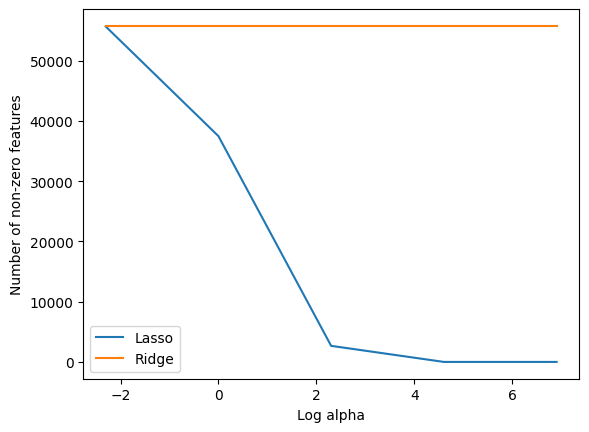

In [15]:
# Plot log of alpha vs number of non zero features.

import matplotlib.pyplot as plt


plt.xlabel('Log alpha')
plt.ylabel('Number of non-zero features')
plt.plot(np.log(alphas), lasso_non_zero_coeff, label='Lasso')
plt.plot(np.log(alphas), ridge_non_zero_coeff, label='Ridge')
plt.legend(loc="lower left")
plt.show()


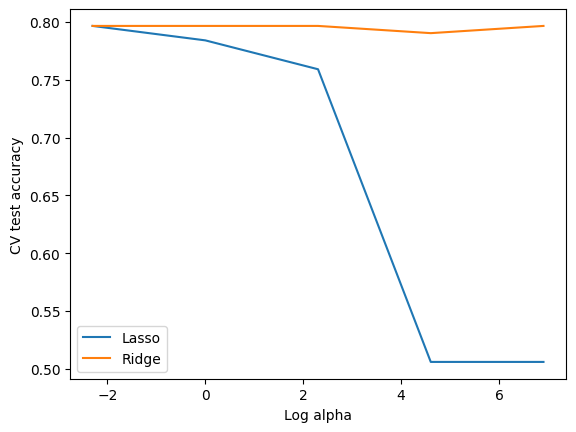

In [16]:
# Plot log of alpha vs mean CV test accuracy.

plt.xlabel('Log alpha')
plt.ylabel('CV test accuracy')
plt.plot(np.log(alphas), lasso_cv_acc, label='Lasso')
plt.plot(np.log(alphas), ridge_cv_acc, label='Ridge')
plt.legend(loc="lower left")
plt.show()


#### Q3: Write a brief explanation for why the accuracy is decreasing in Lasso.


As alpha increases in Lasso (L1 regularization), the model applies stronger regularization by shrinking more feature coefficients to zero. This results in fewer non-zero features being used by the model. Initially, a moderate amount of regularization helps eliminate irrelevant or noisy features, potentially improving the model's performance. However, as alpha becomes too large, the model starts discarding important features along with the irrelevant ones. This underfits the data because the model becomes too simple to capture the underlying relationships, leading to a significant drop in accuracy.

In contrast, Ridge (L2 regularization) shrinks feature coefficients without setting them to zero, which is why the accuracy remains more stable even as alpha increases.

### Section 6: Random forest  - [25 points]
 
In this section, we will implement a random forest algorithm on X_projected (i.e., the data reduced using PCA). We will vary the number of trees and features considered when splitting nodes. 

-  Build random forest models with varying tree counts and features to consider when looking for the split.
-  Perform similar cross-validate with stratified folds, as in Section 5..
-  Record accuracies obtained for the test set for each hyperparameter combination.
-  Plot test accuracy vs tree count for each #features (m, m//2, sqrt(m)) we are using.
-  Repeat the above using just the first 25 components of X_projected (you may create a new cell(s) for this).

Note: Don't forget the last step. 

--------------------------


In [17]:
from sklearn.ensemble import RandomForestClassifier

X_rf = X_projected

num_trees = [1, 50, 100, 200, 300, 500, 1000]
m =  X_rf.shape[1]
max_features = [ m, m//2, 'sqrt']
test_accs = {}

# Create StratifiedKFold validation
skf = StratifiedKFold(n_splits=10)

for features in max_features:
    acc_list = []
    for tree in num_trees:
        # Instantiate a random forest object. Set max_depth=5. 
        clf_rf = RandomForestClassifier(n_estimators=tree, max_features=features, max_depth=5, random_state=42)

        # Perform cross validation
        cv_results = cross_validate(clf_rf, X_rf, y, cv=skf, scoring='accuracy')

        # Record the mean of CV test scores 
        acc_list.append(np.mean(cv_results['test_score']))
        
    # Store accuracies for the current max_features value
    test_accs[features] = acc_list


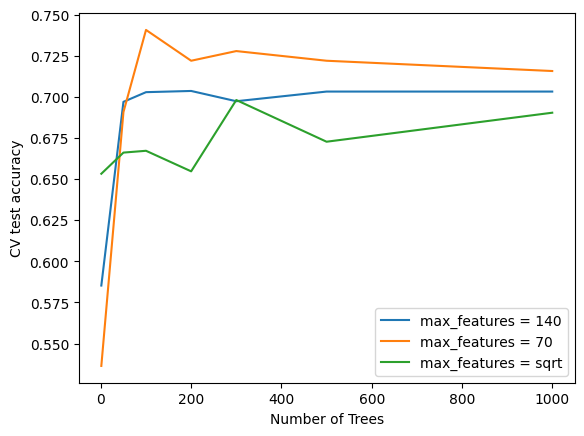

In [18]:
# Plot CV test accuracy vs number of trees 

plt.xlabel('Number of Trees')
plt.ylabel('CV test accuracy')
for i, max_feat in enumerate(max_features):
    plt.plot(num_trees, test_accs[max_feat] , label="max_features = "+str(max_feat))
    
plt.legend(loc="lower right")
plt.show()


In [19]:
# Use only the first 25 components of X_projected
X_rf = X_projected[:, :25]

num_trees = [1, 50, 100, 200, 300, 500, 1000]
m = X_rf.shape[1]
max_features = [m, m // 2, 'sqrt']
test_accs_25 = {}

# Create StratifiedKFold validation
skf = StratifiedKFold(n_splits=10)

# Loop over max features and number of trees
for features in max_features:
    acc_list = []
    for tree in num_trees:
        # Instantiate a random forest object. Set max_depth=5.
        clf_rf = RandomForestClassifier(n_estimators=tree, max_features=features, max_depth=5, random_state=42)
        
        # Perform cross-validation
        cv_results = cross_validate(clf_rf, X_rf, y, cv=skf, scoring='accuracy')
        
        # Record the mean of CV test scores
        acc_list.append(np.mean(cv_results['test_score']))
    
    # Store accuracies for the current max_features value
    test_accs_25[features] = acc_list

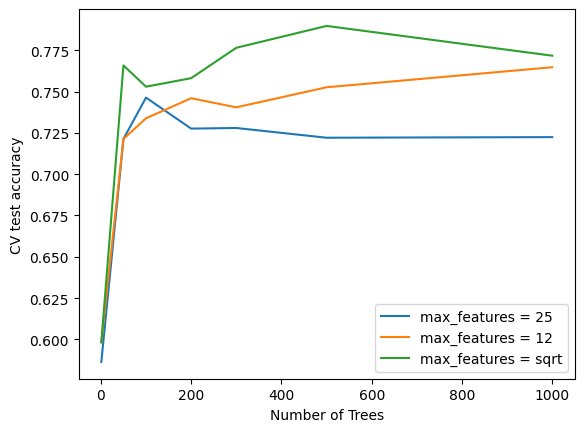

In [20]:
# Plot CV test accuracy vs number of trees for the first 25 components

plt.xlabel('Number of Trees')
plt.ylabel('CV test accuracy')

# Loop through max_features and plot the corresponding accuracies
for i, max_feat in enumerate(max_features):
    plt.plot(num_trees, test_accs_25[max_feat], label="max_features = " + str(max_feat))

plt.legend(loc="lower right")
plt.show()


#### Q4: What are your observations from the plots above?


From the plots, we observe that increasing the number of trees initially improves the model's cross-validation accuracy, with the optimal number of trees typically around 100-300 for the whole faeture set, after which the gains diminish or plateau. The performance of the model is also influenced by the number of features considered at each split (max_features). For the larger feature set (X_projected), using half the features (m/2) provides slightly better accuracy, while for the reduced set (X_projected[:25]), using the square root of the number of features (sqrt(m)) yields the best results. This suggests that with fewer features, introducing more randomness by using fewer features per split helps improve model generalization and avoid overfitting.


The cross-validation accuracy using the first 25 components is higher compared to the entire X_projected matrix. This could be due to overfitting, as a smaller set of features may allow the model to overfit more easily as the number of trees increases. However, with a larger feature set, even with an increased number of trees, the model struggles to maintain consistently high accuracy because the larger number of features prevents it from overfitting as effectively.

### 1 minute feedback 

Your feedback is valuable! Please take some time to fill out the assignment feedback form using the below link. Thank you.

This form is anonymous. 

https://forms.gle/S6kVsKaiL7ciKHWw9